In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import graphviz

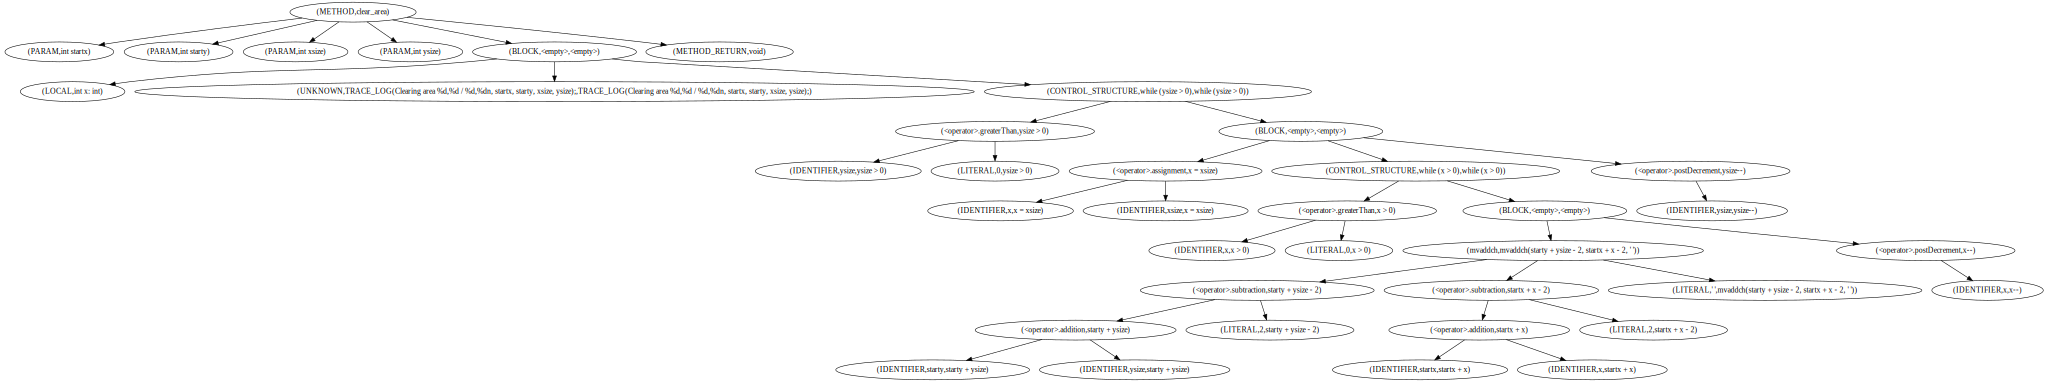

In [7]:
#G = nx.drawing.nx_pydot.read_dot("data/VDISC/test/235350-ast.dot")
graphviz.Source.from_file("test/samples/out/1-ast.dot")

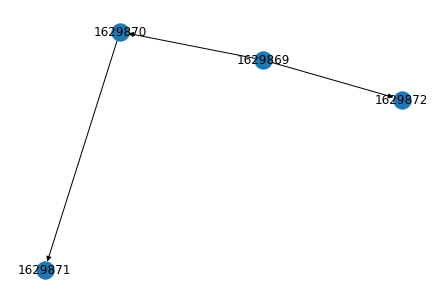

In [24]:
nx.draw(G, with_labels=True)
plt.show()

In [1]:
graphviz.Source.from_file("data/VDISC/train/func_0/ast/0-ast.dot")

NameError: name 'graphviz' is not defined

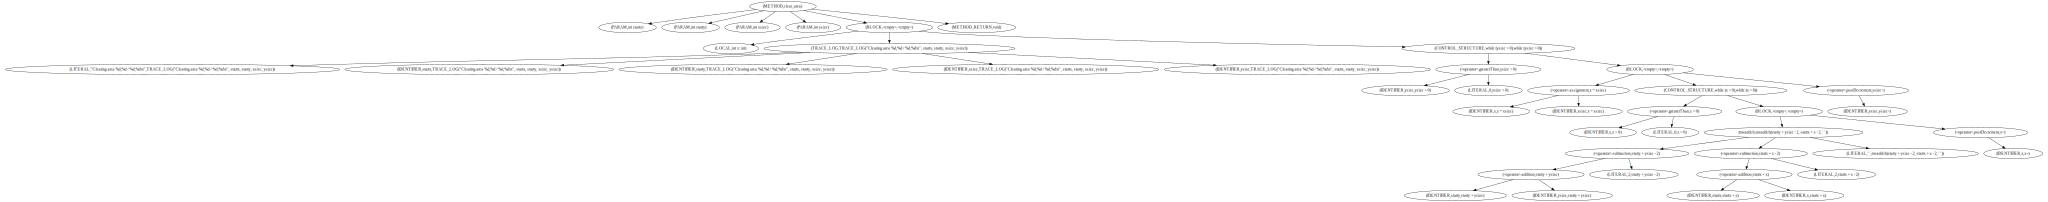

In [52]:
graphviz.Source.from_file("data/VDISC/train/func_0/ast/1-ast.dot")

In [1]:
import pickle
import os

data = pickle.load(open("data/VDISC/test/graphs/ast.pkl", "rb"))
_, func0 = data[0]

FileNotFoundError: [Errno 2] No such file or directory: 'data/VDISC/test/graphs/ast.pkl'

In [ ]:
from IPython.display import Image, display

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

In [12]:
PG = nx.nx_pydot.to_pydot(func0)
view_pydot(PG)

In [30]:
from IPython.display import Image, display
import pickle
import os
import torch
from torch_geometric.utils.convert import from_networkx
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import multiprocessing as mp
from tqdm.contrib.concurrent import process_map  # or thread_map
import tqdm
import time
from parallelbar import progress_map
import numpy as np

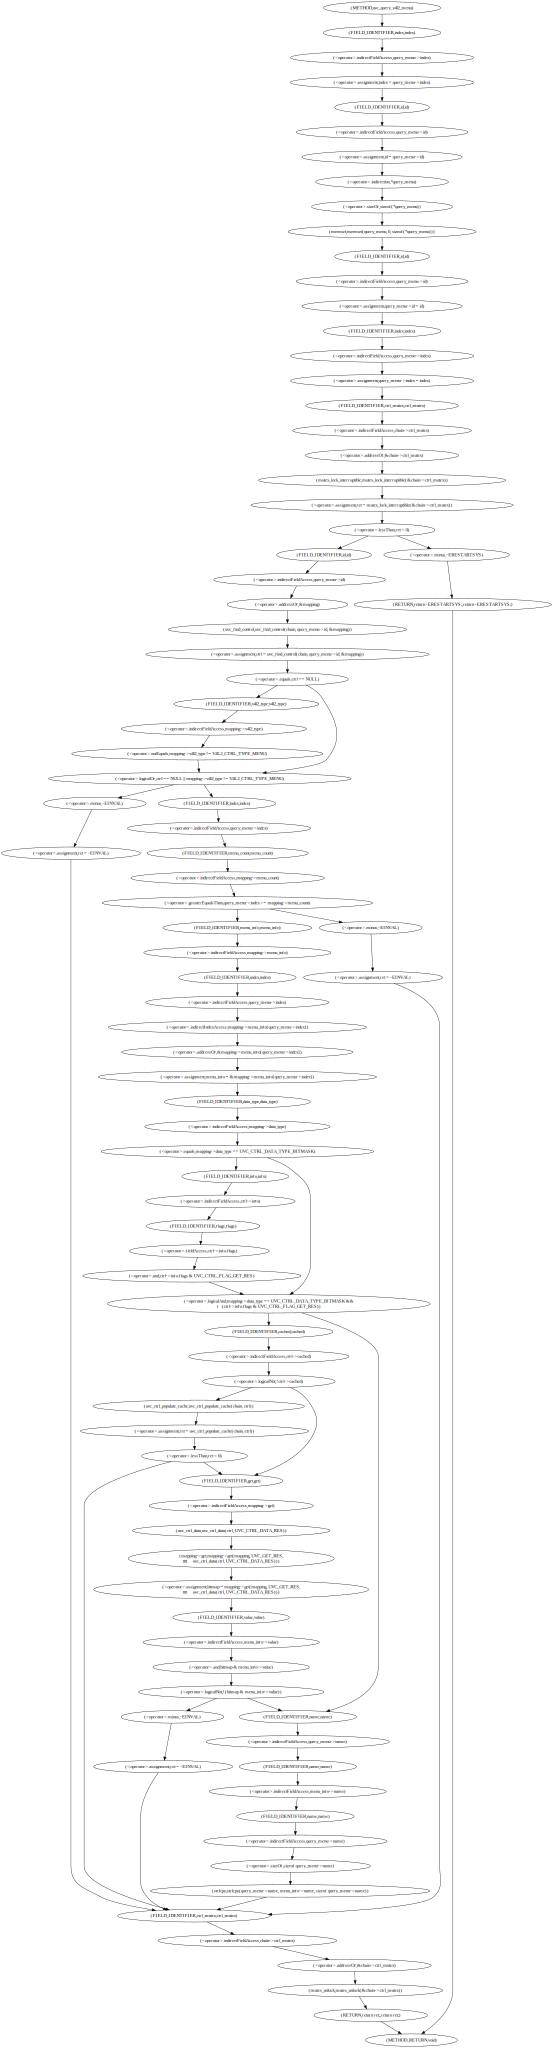

In [31]:
G = nx.drawing.nx_pydot.read_dot("data/VDISC/test/joern/cfg/9-cfg.dot")
graphviz.Source.from_file("data/VDISC/test/joern/cfg/9-cfg.dot")

In [4]:
pyg_G = from_networkx(G)
type(pyg_G)

torch_geometric.data.data.Data

In [5]:
def graph_from_dot(fpath):
    return nx.drawing.nx_pydot.read_dot(fpath)

In [8]:
import multiprocessing as mp
from tqdm.contrib.concurrent import process_map  # or thread_map
import tqdm
import time
from parallelbar import progress_map

# pool = mp.Pool(6)
# args_iterable = os.listdir("data/VDISC/test/joern/cfg/")
# args_iterable = ["data/VDISC/test/joern/cfg/" + a for a in args_iterable]
# graphs = pool.map(graph_from_dot, args_iterable)
# pool.close()
# pool.join()

#tqdm_class=tqdm.notebook.tqdm
pool = mp.Pool(10)
args_iterable = os.listdir("data/VDISC/test/joern/cfg/")
args_iterable = ["data/VDISC/test/joern/cfg/" + a for a in args_iterable]

#graphs = process_map(graph_from_dot, args_iterable, max_workers=8, chunksize=10)
graphs = list(tqdm.tqdm(pool.imap(graph_from_dot, args_iterable), total=len(args_iterable)))

100%|██████████████████████████████████████████████████| 529120/529120 [2:01:57<00:00, 72.31it/s]


In [27]:
import pickle

with open('test/jupyter_ast.pkl', 'wb') as f:
    pickle.dump(graphs, f, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
import pickle
graphs = pickle.load(open('test/jupyter_ast.pkl', 'rb'))

In [ ]:
cfg_graphs = pickle.load(open())

In [51]:
#for i in range(20):
#    print(graphs[i].number_of_nodes())

graphs[3].nodes
G = graphs[3]
[n for n,d in G.in_degree() if d==0]
G.nodes['6000793']['label']

'"(METHOD,NotifyUpdate)"'

In [53]:
tg = from_networkx(G)

G.nodes.items()

ItemsView(NodeView(('6000801', '6000804', '6000798', '6000808', '6000813', '6000809', '6000812', '6000814', '6000815', '6000820', '6000816', '6000819', '6000793', '6000821')))

In [32]:
import re
import codecs

# Clean Gadget
# Author https://github.com/johnb110/VDPython:
# For each gadget, replaces all user variables with "VAR#" and user functions with "FUN#"
# Removes content from string and character literals keywords up to C11 and C++17; immutable set
from typing import List

keywords = frozenset({'__asm', '__builtin', '__cdecl', '__declspec', '__except', '__export', '__far16', '__far32',
                      '__fastcall', '__finally', '__import', '__inline', '__int16', '__int32', '__int64', '__int8',
                      '__leave', '__optlink', '__packed', '__pascal', '__stdcall', '__system', '__thread', '__try',
                      '__unaligned', '_asm', '_Builtin', '_Cdecl', '_declspec', '_except', '_Export', '_Far16',
                      '_Far32', '_Fastcall', '_finally', '_Import', '_inline', '_int16', '_int32', '_int64',
                      '_int8', '_leave', '_Optlink', '_Packed', '_Pascal', '_stdcall', '_System', '_try', 'alignas',
                      'alignof', 'and', 'and_eq', 'asm', 'auto', 'bitand', 'bitor', 'bool', 'break', 'case',
                      'catch', 'char', 'char16_t', 'char32_t', 'class', 'compl', 'const', 'const_cast', 'constexpr',
                      'continue', 'decltype', 'default', 'delete', 'do', 'double', 'dynamic_cast', 'else', 'enum',
                      'explicit', 'export', 'extern', 'false', 'final', 'float', 'for', 'friend', 'goto', 'if',
                      'inline', 'int', 'long', 'mutable', 'namespace', 'new', 'noexcept', 'not', 'not_eq', 'nullptr',
                      'operator', 'or', 'or_eq', 'override', 'private', 'protected', 'public', 'register',
                      'reinterpret_cast', 'return', 'short', 'signed', 'sizeof', 'static', 'static_assert',
                      'static_cast', 'struct', 'switch', 'template', 'this', 'thread_local', 'throw', 'true', 'try',
                      'typedef', 'typeid', 'typename', 'union', 'unsigned', 'using', 'virtual', 'void', 'volatile',
                      'wchar_t', 'while', 'xor', 'xor_eq', 'NULL'})
# holds known non-user-defined functions; immutable set
main_set = frozenset({'main'})
# arguments in main function; immutable set
main_args = frozenset({'argc', 'argv'})

operators3 = {'<<=', '>>='}
operators2 = {
    '->', '++', '--', '**',
    '!~', '<<', '>>', '<=', '>=',
    '==', '!=', '&&', '||', '+=',
    '-=', '*=', '/=', '%=', '&=', '^=', '|='
}
operators1 = {
    '(', ')', '[', ']', '.',
    '+', '&',
    '%', '<', '>', '^', '|',
    '=', ',', '?', ':',
    '{', '}', '!', '~'
}


def to_regex(lst):
    return r'|'.join([f"({re.escape(el)})" for el in lst])


regex_split_operators = to_regex(operators3) + to_regex(operators2) + to_regex(operators1)


# input is a list of string lines
def clean_gadget(gadget):
    # dictionary; map function name to symbol name + number
    fun_symbols = {}
    # dictionary; map variable name to symbol name + number
    var_symbols = {}

    fun_count = 1
    var_count = 1

    # regular expression to find function name candidates
    rx_fun = re.compile(r'\b([_A-Za-z]\w*)\b(?=\s*\()')
    # regular expression to find variable name candidates
    # rx_var = re.compile(r'\b([_A-Za-z]\w*)\b(?!\s*\()')
    rx_var = re.compile(r'\b([_A-Za-z]\w*)\b((?!\s*\**\w+))(?!\s*\()')

    # final cleaned gadget output to return to interface
    cleaned_gadget = []

    for line in gadget:
        # replace any non-ASCII characters with empty string
        ascii_line = re.sub(r'[^\x00-\x7f]', r'', line)
        # remove all hexadecimal literals
        hex_line = re.sub(r'0[xX][0-9a-fA-F]+', "HEX", ascii_line)
        # return, in order, all regex matches at string list; preserves order for semantics
        user_fun = rx_fun.findall(hex_line)
        user_var = rx_var.findall(hex_line)

        # Could easily make a "clean gadget" type class to prevent duplicate functionality
        # of creating/comparing symbol names for functions and variables in much the same way.
        # The comparison frozenset, symbol dictionaries, and counters would be class scope.
        # So would only need to pass a string list and a string literal for symbol names to
        # another function.
        for fun_name in user_fun:
            if len({fun_name}.difference(main_set)) != 0 and len({fun_name}.difference(keywords)) != 0:
                # check to see if function name already in dictionary
                if fun_name not in fun_symbols.keys():
                    fun_symbols[fun_name] = 'FUN' + str(fun_count)
                    fun_count += 1
                # ensure that only function name gets replaced (no variable name with same
                # identifier); uses positive lookforward
                hex_line = re.sub(r'\b(' + fun_name + r')\b(?=\s*\()', fun_symbols[fun_name], hex_line)

        for var_name in user_var:
            # next line is the nuanced difference between fun_name and var_name
            if len({var_name[0]}.difference(keywords)) != 0 and len({var_name[0]}.difference(main_args)) != 0:
                # check to see if variable name already in dictionary
                if var_name[0] not in var_symbols.keys():
                    var_symbols[var_name[0]] = 'VAR' + str(var_count)
                    var_count += 1
                # ensure that only variable name gets replaced (no function name with same
                # identifier); uses negative lookforward
                # print(var_name, gadget, user_var)
                hex_line = re.sub(r'\b(' + var_name[0] + r')\b(?:(?=\s*\w+\()|(?!\s*\w+))(?!\s*\()',
                                  var_symbols[var_name[0]], hex_line)

        cleaned_gadget.append(hex_line)
    # return the list of cleaned lines
    return cleaned_gadget


# Cleaner & Tokenizer
# Author https://github.com/hazimhanif/svd-transformer/blob/master/transformer_svd.ipynb

def tokenizer(code, flag=False):
    gadget: List[str] = []
    tokenized: List[str] = []
    # remove all string literals
    no_str_lit_line = re.sub(r'["]([^"\\\n]|\\.|\\\n)*["]', '', code)
    # remove all character literals
    no_char_lit_line = re.sub(r"'.*?'", "", no_str_lit_line)
    code = no_char_lit_line

    if flag:
        code = codecs.getdecoder("unicode_escape")(no_char_lit_line)[0]

    for line in code.splitlines():
        if line == '':
            continue
        stripped = line.strip()
        # if "\\n\\n" in stripped: print(stripped)
        gadget.append(stripped)

    clean = clean_gadget(gadget)

    for cg in clean:
        if cg == '':
            continue

        # Remove code comments
        pat = re.compile(r'(/\*([^*]|(\*+[^*\/]))*\*+\/)|(\/\/.*)')
        cg = re.sub(pat, '', cg)

        # Remove newlines & tabs
        cg = re.sub('(\n)|(\\\\n)|(\\\\)|(\\t)|(\\r)', '', cg)
        # Mix split (characters and words)
        splitter = r' +|' + regex_split_operators + r'|(\/)|(\;)|(\-)|(\*)'
        cg = re.split(splitter, cg)

        # Remove None type
        cg = list(filter(None, cg))
        cg = list(filter(str.strip, cg))
        # code = " ".join(code)
        # Return list of tokens
        tokenized.extend(cg)

    return tokenized

In [39]:
file_names = pickle.load(open("test/file_names", "rb"))
func_names = pickle.load(open("test/func_names", "rb"))

In [40]:
def get_graph_indices_names(graphs):
    to_ret = {}
    for i in range(len(graphs)):
        G = graphs[i]
        pos = [n for n,d in G.in_degree() if d==0]
        name_full = G.nodes[pos[0]]['label']
        key = name_full[name_full.find(",") + 1:-2]
        to_ret[key] = i
    return to_ret

In [7]:
graph_names = get_graph_indices_names(graphs)

In [24]:
keys = []
for key, value in graph_names.items() :
    keys.append(key)

In [35]:
print(keys[274424])

rtsp_set_field


In [41]:
def find_graph(graph_names, graphs, file_name, func_name):
    label = 0
    if "vuln" in file_name:
        label = 1
    try:
        idx = graph_names[func_name.strip()]
        return (label, graphs[idx])
    except KeyError:
        print("Function name ''" + func_name + "' not found, skipping.")
        return ()

In [161]:
# G = find_graph((graph_names, graphs, file_names[0], func_names[0]))
# # pool = mp.Pool(20)
# # args_iterable = [(graph_names, graphs, file_names[i], func_names[i]) for i in range(len(file_names))]
# # tuples = list(tqdm.tqdm(pool.imap(find_graph, args_iterable), total=len(args_iterable)))

In [162]:
tuples = []
for i in range(len(file_names)):
    #print(func_names[i].strip())
    tuples.append(find_graph(graph_names, graphs, file_names[i], func_names[i]))

Function name ''common_select_close' not found, skipping.
Function name ''Exp_MatchMaxObjCmd' not found, skipping.
Function name ''gen_split_2110 ' not found, skipping.
Function name ''external_check_param_set' not found, skipping.
Function name ''iwl_dbgfs_scan_ant_rxchain_read' not found, skipping.
Function name ''pdo_sqlite_get_attribute' not found, skipping.
Function name ''upnp_dscv_got_external_ip' not found, skipping.
Function name ''mbox_test_message_write' not found, skipping.
Function name ''tile_state_notify ' not found, skipping.
Function name ''OnDelete' not found, skipping.
Function name ''pump_update_resume_path ' not found, skipping.
Function name ''__ecereMethod___ecereNameSpace__ecere__gui__controls__DataRow_Edit' not found, skipping.
Function name ''sftkdb_resolveConflicts' not found, skipping.
Function name ''getmax_box' not found, skipping.
Function name ''php_stream_open_for_zend_ex' not found, skipping.
Function name ''sst_module_new' not found, skipping.
Functio

Function name ''vis_link_visual' not found, skipping.
Function name ''operator*' not found, skipping.
Function name ''sslHandshake' not found, skipping.
Function name ''SWIG_ZTS_SetPointerZval' not found, skipping.
Function name ''operator' not found, skipping.
Function name ''main_show_vesa' not found, skipping.
Function name ''tty_set_terminators' not found, skipping.
Function name ''tp_or_register_operand ' not found, skipping.
Function name ''GreetBasket' not found, skipping.
Function name ''CopyAndCastFrom' not found, skipping.
Function name ''snd_pcm_info_user' not found, skipping.
Function name ''process_payloads' not found, skipping.
Function name ''print_disjuncts_map' not found, skipping.
Function name ''operator<<' not found, skipping.
Function name ''Perl_vwarner' not found, skipping.
Function name ''CLASS_get_event_desc' not found, skipping.
Function name ''radius_pdu_create' not found, skipping.
Function name ''monster_can_flow' not found, skipping.
Function name ''Highli

In [42]:
pickle.dump(tuples, open("test/tuples_ast.pkl", "wb"))

In [26]:
import pickle
tuples = pickle.load(open("test/tuples_ast.pkl", "rb"))

In [4]:
from torch_geometric.data import Data
from gensim.models.keyedvectors import Word2VecKeyedVectors

In [16]:
label, G = tuples[0]
_, G2 = tuples[1]

In [17]:
pos = [n for n,d in G.in_degree() if d==0]
name_full = G.nodes[pos[0]]['label']
key = name_full[name_full.find(",") + 1:-2]
labels = []
for N in G.nodes:
    labels.append(G.nodes[N]['label'])

In [18]:
tokens = []
for l in labels:
        tokens.append(tokenizer(l[l.find(",") + 1:-2]))

In [22]:
import gensim
model = gensim.models.Word2Vec()

In [23]:
model.build_vocab(sentences=tokens)
tokens

[['VAR1', '->', 'VAR2'],
 ['VAR1', ',', 'VAR1'],
 ['FUN1',
  '(',
  'VAR1',
  '->',
  'VAR2',
  ',',
  '0',
  ',',
  '0',
  ',',
  '-',
  '1',
  ',',
  '-',
  '1',
  ',',
  'VAR3',
  ',',
  'VAR1',
  '->',
  'VAR4',
  '.',
  'VAR5',
  ',',
  'VAR1',
  '->',
  'VAR4',
  '.',
  'VAR6',
  ')'],
 ['VAR1', '->', 'VAR2', '->', 'VAR3', '=', 'VAR4'],
 ['VAR1', '=', 'VAR2', '->', 'VAR3', '.', 'VAR4', '.', 'VAR5'],
 ['VAR1', '=', 'VAR2', '->', 'VAR3', '.', 'VAR4', '+', 'VAR2', '->', 'VAR5'],
 ['VAR1',
  '=',
  'VAR2',
  '->',
  'VAR3',
  '.',
  'VAR4',
  '+',
  'VAR2',
  '->',
  'VAR5',
  '+',
  'VAR2',
  '->',
  'VAR6',
  '.',
  'VAR7',
  '.',
  'VAR8'],
 ['VAR1', '=', '-', '1'],
 ['VAR1', '=', '0'],
 ['FUN1', '(', 'VAR1', ')'],
 ['FUN1', '(', 'VAR1', '->', 'VAR2', ')'],
 ['VAR1',
  '=',
  'VAR2',
  '->',
  'VAR3',
  '.',
  'VAR4',
  '-',
  'VAR5',
  '->',
  'VAR6',
  '.',
  'VAR4',
  '-',
  'VAR5',
  '->',
  'VAR7'],
 ['VAR1',
  '=',
  'VAR2',
  '->',
  'VAR3',
  '.',
  'VAR4',
  '-',
  'VAR5'

In [ ]:
model.train(tokens, total_examples=model.corpus_count, epochs=1)

In [ ]:
model.wv.vocab

In [ ]:
tok = tokens[0]
print(tok)
if "->" in model.wv.vocab:
    print("ya")

In [ ]:
model.wv["->"]

tok = model.wv["->"]

In [14]:
# TAKE ALL THE CODE TOKENS IN A NODE AND AVERAGE THEM WITH THE W2V MODEL!!!
from torch_geometric.utils.convert import from_networkx
import torch_geometric

nG = nx.Graph()
# DO GRAPH EMBEDDING
for n in G.nodes:
    nG.add_nodes_from([(int(n), {'x': tok})])
    
for e in G.edges:
    in_node, out_node, _ = e
    nG.add_edge(int(in_node), int(out_node))
    
dG = from_networkx(nG)
dG.label = 0
print(dG.x)
print(dG.edge_index.shape)
g = torch_geometric.utils.to_networkx(dG, to_undirected=True)
# for N in G.nodes:
#     labels.append(G.nodes[N]['label'])
    
# tokens = []
# for l in labels:
#     tokens.append(tokenizer(l[l.find(",") + 1:-2]))

# for E in G.edges:
#     in_node, out_node, _ = E
#     print(in_node, out_node)

NameError: name 'tok' is not defined

In [ ]:
# def tuples_to_torch_data(tuples):
#     for label, G in tuples:
#         newG = nx.Graph()
#         for n in G.nodes:
#             newG.add_nodes_from([(int(n), {'x': tok})])
    
#     for e in G.edges:
#         in_node, out_node, _ = e
#         newG.add_edge(int(in_node), int(out_node))
# CORRECT     

In [15]:
# CORRECT METHOD FOR EMBEDDING

def graph_to_torch_data(params):
    label, G, wv = params
    newG = nx.Graph()
    for n in G.nodes:
        l = G.nodes[n]['label']
        cur_toks = tokenizer(l[l.find(",") + 1:-2])
        try:
            newG.add_nodes_from([(int(n), {'x': np.array(wv[cur_toks])})])
        except KeyError: #add empty vector to node
            newG.add_nodes_from([(int(n), {'x': np.zeros(wv.vector_size)})])
    
    for e in G.edges:
        in_node, out_node, _ = e
        #if newG.has_node(in_node) and newG.has_node(out_node): #don't add random edges
        newG.add_edge(int(in_node), int(out_node))
    dG = from_networkx(newG)
    dG.label = label
    dG.y = label
    xs = []
    for cur_node in dG.x:
        to_add = np.mean(np.array(cur_node), axis = 0)
        if to_add.shape != (100,): # pad empty nodes
            to_add = np.zeros(wv.vector_size)
        xs.append(to_add)
    
    dG.x = torch.Tensor(xs)
#     if dG.x.size(0) - 1 != dG.edge_index.max().size(0):
#         print('BADBADBADBAD')
    #print(dG.x.size(0), dG.edge_index.max())
    return dG

In [14]:
def get_all_tokens_from_graph(t):
    _, G = t
    tokens = []
    for n in G.nodes:
        l = G.nodes[n]['label']
        tokens.append(tokenizer(l[l.find(",") + 1:-2]))
    return tokens

In [32]:
import gensim
w2v = gensim.models.Word2Vec()
# REMOVE EMPTY TUPLES
tuples = [t for t in tuples if t]
# toks = get_all_tokens(tuples)

In [11]:
pool = mp.Pool(10)
toks = list(tqdm.tqdm(pool.imap(get_all_tokens_from_graph, tuples), total=len(tuples)))

100%|██████████████████████████████████████████████████| 122517/122517 [01:45<00:00, 1160.33it/s]
Process ForkPoolWorker-3:
Process ForkPoolWorker-10:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/mnt/raid0_24TB/rimon/miniconda3/envs/pytorch-build/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/mnt/raid0_24TB/rimon/miniconda3/envs/pytorch-build/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/mnt/raid0_24TB/rimon/miniconda3/envs/pytorch-build/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/mnt/raid0_24TB/rimon/miniconda3/envs/pytorch-build/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/mnt/raid0_24TB/rimo

  File "/mnt/raid0_24TB/rimon/miniconda3/envs/pytorch-build/lib/python3.8/multiprocessing/connection.py", line 414, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/mnt/raid0_24TB/rimon/miniconda3/envs/pytorch-build/lib/python3.8/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [30]:
flat_toks = [item for sublist in toks for item in sublist]

In [33]:
import gensim
w2v = gensim.models.Word2Vec()
w2v.build_vocab(sentences=flat_toks)
w2v.train(flat_toks, total_examples=w2v.corpus_count, epochs=1)

(7444874, 28330244)

In [34]:
for word, vocab_obj in w2v.wv.vocab.items():
    print(word)

VAR1
->
VAR2
,
FUN1
(
0
-
1
VAR3
VAR4
.
VAR5
VAR6
)
=
+
VAR7
VAR8
VAR9
VAR10
FUN2
/
*
VAR11
<
==
||
!=
++
+=
VAR12
VAR13
VAR14
VAR15
250
void
NULL
return
;
"VAR3"
"VAR4"
88
"VAR2"
"VAR3
VAR4"
VAR5VAR6VAR6VAR6VAR6VAR6
"VAR7"
VAR5VAR6VAR6VAR6VAR6t
VAR3VAR4VAR4VAR4
"unknown
FUN3
%
"
""
"VAR2
VAR3"
VAR4VAR5VAR5VAR5VAR5VAR5
"VAR6"
VAR4VAR5VAR5VAR5VAR5t
[
]
&
"VAR1
:
08lxVAR3"
!
>=
4
this
&&
VAR4FUN1
false
true
float
>
new
VAR2"
delete
VAR4VAR5VAR6
<=
"invalid
int
--
-=
1000
"Sending
play
Stream
2f
sending
VAR5"
|
VAR3VAR4t
50
VAR2VAR3t
expected
numeric
not
VAR1"
VAR5VAR6VAR6VAR6t
p
could
VAR4VAR5"
VAR5VAR6t
VAR4VAR5VAR5VAR5t
private
VAR1VAR2VAR3VAR3
VAR2VAR3VAR3
VAR7VAR2VAR3VAR3
VAR5VAR2VAR3VAR3
VAR2VAR3VAR3VAR3
VAR1VAR2VAR2VAR2VAR2VAR3
can
only
be
used
before
calling
16
"VAR1"
3
8
2
nu
5
rnd2
struct
<<
VAR5VAR6VAR6t
VAR2VAR6
VAR2VAR6t
sizeof
?
VAR4VAR5VAR5t
VAR3VAR4VAR4VAR4FUN2
10
11
15
VAR4VAR5VAR5"
VAR4VAR5VAR5VAR6
VAR5VAR6VAR7
VAR5VAR6VAR10
>>
VAR4VAR5VAR9
"no
VAR4VAR5VAR5VAR5VAR5VAR5VA

In [148]:
# args_iterable = [(tuples[i][0], tuples[i][1], w2v.wv) for i in range(len(tuples))]
# i = 0
# for a in args_iterable:
#     i += 1
#     print("finished: " + str(i))
#     graph_to_torch_data(a)
args_iterable = [(tuples[i][0], tuples[i][1], w2v.wv) for i in range(len(tuples))]
torch_data = list(tqdm.tqdm(map(graph_to_torch_data, args_iterable), total=len(args_iterable)))

100%|████████████████████████████████████████████████████| 122517/122517 [22:27<00:00, 90.89it/s]


In [ ]:
pickle.dump(torch_data, open("test/torch_data_ast.pkl", "wb"))

In [54]:
ast_graphs = pickle.load(open("data/VDISC/test/graphs/ast.pkl", "rb"))
cfg_graphs = pickle.load(open("data/VDISC/test/graphs/cfg.pkl", "rb"))

1

In [ ]:
cfg_graphs[0].number_of_edges()

In [42]:
graph_names = get_graph_indices_names(cfg_graphs)

In [48]:
cfg_tuples = []
for i in range(len(file_names)):
    cfg_tuples.append(find_graph(graph_names, cfg_graphs, file_names[i], func_names[i]))

Function name ''common_select_close' not found, skipping.
Function name ''Exp_MatchMaxObjCmd' not found, skipping.
Function name ''gen_split_2110 ' not found, skipping.
Function name ''external_check_param_set' not found, skipping.
Function name ''iwl_dbgfs_scan_ant_rxchain_read' not found, skipping.
Function name ''pdo_sqlite_get_attribute' not found, skipping.
Function name ''upnp_dscv_got_external_ip' not found, skipping.
Function name ''mbox_test_message_write' not found, skipping.
Function name ''tile_state_notify ' not found, skipping.
Function name ''OnDelete' not found, skipping.
Function name ''pump_update_resume_path ' not found, skipping.
Function name ''__ecereMethod___ecereNameSpace__ecere__gui__controls__DataRow_Edit' not found, skipping.
Function name ''sftkdb_resolveConflicts' not found, skipping.
Function name ''getmax_box' not found, skipping.
Function name ''php_stream_open_for_zend_ex' not found, skipping.
Function name ''sst_module_new' not found, skipping.
Functio

Function name ''init_tsc_clocksource' not found, skipping.
Function name ''copy_ucs2_from_user' not found, skipping.
Function name ''user_ucs2_strsize' not found, skipping.
Function name ''_poly_add' not found, skipping.
Function name ''retrieve_byte' not found, skipping.
Function name ''swsusp_alloc' not found, skipping.
Function name ''operator==' not found, skipping.
Function name ''efivarfs_file_write' not found, skipping.
Function name ''GetMedianList' not found, skipping.
Function name ''rpc_C_CreateObject ' not found, skipping.
Function name ''fc_xchg_expired ' not found, skipping.
Function name ''spl_array_get_properties' not found, skipping.
Function name ''__ecereMethod___ecereNameSpace__ecere__com__Container_OnUnserialize' not found, skipping.
Function name ''operator<<' not found, skipping.
Function name ''ves_icall_System_Array_GetLength ' not found, skipping.
Function name ''com_touch' not found, skipping.
Function name ''Sequence_print_raw ' not found, skipping.
Function

In [53]:
cfg_tuples[1][1].number_of_nodes()

35

In [23]:
# GET ALL STUFF FOR CFGs

cfg_tuples = pickle.load(open("data/VDISC/test/tuples/cfg_tuples.pkl", "rb"))

In [36]:
cfg_tuples[0][1].number_of_nodes()

243

In [12]:
cfg_tuples = [t for t in cfg_tuples if t]
import gensim
w2v = gensim.models.Word2Vec()

In [18]:
pool = mp.Pool(10)
toks = list(tqdm.tqdm(pool.imap(get_all_tokens_from_graph, cfg_tuples), total=len(cfg_tuples)))

100%|██████████████████████████████████████████████████| 122517/122517 [02:01<00:00, 1005.85it/s]


In [20]:
flat_toks = [item for sublist in toks for item in sublist]
w2v.build_vocab(sentences=flat_toks)
w2v.train(flat_toks, total_examples=w2v.corpus_count, epochs=1)

(7672167, 29987348)

In [21]:
args_iterable = [(cfg_tuples[i][0], cfg_tuples[i][1], w2v.wv) for i in range(len(cfg_tuples))]
torch_data = list(tqdm.tqdm(map(graph_to_torch_data, args_iterable), total=len(args_iterable)))

  0%|                                                                 | 0/122517 [00:00<?, ?it/s]/mnt/raid0_24TB/rimon/miniconda3/envs/pytorch-build/lib/python3.8/site-packages/torch_geometric/utils/convert.py:178: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /mnt/raid0_24TB/rimon/research/code_analysis/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  data[key] = torch.tensor(value)
100%|████████████████████████████████████████████████████| 122517/122517 [23:07<00:00, 88.29it/s]


In [22]:
pickle.dump(torch_data, open("test/torch_data_cfg.pkl", "wb"))

In [139]:
torch_data[0].x

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [105]:
device = torch.device('cuda')
data_cuda = []
for d in torch_data:
    data_cuda.append(d.to(device))

In [106]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Dataset
from sklearn.model_selection import train_test_split

split = train_test_split(data_cuda, test_size=.25)
len(split[1])
print(np.shape(data_cuda[0].x[2]))

torch.Size([100])


In [129]:
# load into a torch geo dataset
train_batches = DataLoader(split[0], batch_size=25)
test_batches = DataLoader(split[1], batch_size=25)

for tb in train_batches:
    print(tb)
# for tb in train_batches:
#     tb = tb.to(device)
    
# for tb in test_batches:
#     tb = tb.to(device)
    

import torch
import torch.nn as nn
import torch_geometric.nn as geom_nn
import torch_geometric.data as geom_data
import torch.utils.data as data
import torch.optim as optim
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [108]:
gnn_layer_by_name = {
    "GCN": geom_nn.GCNConv,
    "GAT": geom_nn.GATConv,
    "GraphConv": geom_nn.GraphConv
}

In [109]:
class GNNModel(nn.Module):
    
    def __init__(self, c_in, c_hidden, c_out, num_layers=2, layer_name="GCN", dp_rate=0.1, **kwargs):
        """
        Inputs:
            c_in - Dimension of input features
            c_hidden - Dimension of hidden features
            c_out - Dimension of the output features. Usually number of classes in classification
            num_layers - Number of "hidden" graph layers
            layer_name - String of the graph layer to use
            dp_rate - Dropout rate to apply throughout the network
            kwargs - Additional arguments for the graph layer (e.g. number of heads for GAT)
        """
        super().__init__()
        gnn_layer = gnn_layer_by_name[layer_name]
        
        layers = []
        in_channels, out_channels = c_in, c_hidden
        for l_idx in range(num_layers - 1):
            layers += [
                gnn_layer(in_channels=in_channels, out_channels=out_channels, **kwargs), nn.ReLU(inplace=True), 
                nn.Dropout(dp_rate)
            ]
            in_channels = c_hidden
        layers += [gnn_layer(in_channels=in_channels, out_channels=c_out, **kwargs)]
        self.layers = nn.ModuleList(layers)
        
    def forward(self, x, edge_index):
        """
        Inputs:
            x - Input features per node
            edge_index - List of vertex index pairs representing the edges in the graph (PyTorch geometric notation)
        """
        for l in self.layers:
            # For graph layers, we need to add the "edge_index" tensor as additional input
            # All PyTorch Geometric graph layer inherit the class "MessagePassing", hence
            # we can simply check the class type.
            if isinstance(l, geom_nn.MessagePassing):
                print(edge_index)
                x = l(x, edge_index)
            else:
                x = l(x)
        return x

In [110]:
class MLPModel(nn.Module):

    def __init__(self, c_in, c_hidden, c_out, num_layers=2, dp_rate=0.1):
        """
        Inputs:
            c_in - Dimension of input features
            c_hidden - Dimension of hidden features
            c_out - Dimension of the output features. Usually number of classes in classification
            num_layers - Number of hidden layers
            dp_rate - Dropout rate to apply throughout the network
        """
        super().__init__()
        layers = []
        in_channels, out_channels = c_in, c_hidden
        for l_idx in range(num_layers-1):
            layers += [
                nn.Linear(in_channels, out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(dp_rate)
            ]
            in_channels = c_hidden
        layers += [nn.Linear(in_channels, c_out)]
        self.layers = nn.Sequential(*layers)

    def forward(self, x, *args, **kwargs):
        """
        Inputs:
            x - Input features per node
        """
        return self.layers(x)

In [111]:
class GraphGNNModel(nn.Module):

    def __init__(self, c_in, c_hidden, c_out, dp_rate_linear=0.5, **kwargs):
        """
        Inputs:
            c_in - Dimension of input features
            c_hidden - Dimension of hidden features
            c_out - Dimension of output features (usually number of classes)
            dp_rate_linear - Dropout rate before the linear layer (usually much higher than inside the GNN)
            kwargs - Additional arguments for the GNNModel object
        """
        super().__init__()
        self.GNN = GNNModel(c_in=c_in,
                            c_hidden=c_hidden,
                            c_out=c_hidden, # Not our prediction output yet!
                            **kwargs)
        self.head = nn.Sequential(
            nn.Dropout(dp_rate_linear),
            nn.Linear(c_hidden, c_out)
        )

    def forward(self, x, edge_index, batch_idx):
        """
        Inputs:
            x - Input features per node
            edge_index - List of vertex index pairs representing the edges in the graph (PyTorch geometric notation)
            batch_idx - Index of batch element for each node
        """
        x = self.GNN(x, edge_index)
        x = geom_nn.global_mean_pool(x, batch_idx) # Average pooling
        x = self.head(x)
        return x

In [112]:
class GraphLevelGNN(pl.LightningModule):

    def __init__(self, **model_kwargs):
        super().__init__()
        # Saving hyperparameters
        self.save_hyperparameters()

        self.model = GraphGNNModel(**model_kwargs)
        self.loss_module = nn.BCEWithLogitsLoss() if self.hparams.c_out == 1 else nn.CrossEntropyLoss()

    def forward(self, data, mode="train"):
        x, edge_index, batch_idx = data.x, data.edge_index, data.batch
        x = self.model(x, edge_index, batch_idx)
        x = x.squeeze(dim=-1)

        if self.hparams.c_out == 1:
            preds = (x > 0).float()
            data.y = data.y.float()
        else:
            preds = x.argmax(dim=-1)
        loss = self.loss_module(x, data.y)
        acc = (preds == data.y).sum().float() / preds.shape[0]
        return loss, acc

    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(), lr=1e-2, weight_decay=0.0) # High lr because of small dataset and small model
        return optimizer

    def training_step(self, batch, batch_idx):
        loss, acc = self.forward(batch, mode="train")
        self.log('train_loss', loss)
        self.log('train_acc', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        _, acc = self.forward(batch, mode="val")
        self.log('val_acc', acc)

    def test_step(self, batch, batch_idx):
        _, acc = self.forward(batch, mode="test")
        self.log('test_acc', acc)

In [113]:
def train_graph_classifier(model_name, **model_kwargs):
    pl.seed_everything(42)

    # Create a PyTorch Lightning trainer with the generation callback
    root_dir = os.path.join("test", "GraphLevel" + model_name)
    #os.makedirs(root_dir, exist_ok=True)
    trainer = pl.Trainer(default_root_dir=root_dir,
                         callbacks=[ModelCheckpoint(save_weights_only=True, mode="max", monitor="val_acc")],
                         gpus=1 if str(device).startswith("cuda") else 0,
                         max_epochs=5,
                         progress_bar_refresh_rate=0)
    trainer.logger._default_hp_metric = None # Optional logging argument that we don't need

    # Check whether pretrained model exists. If yes, load it and skip training
    pretrained_filename = os.path.join("test", f"GraphLevel{model_name}.ckpt")
    if os.path.isfile(pretrained_filename):
        print("Found pretrained model, loading...")
        model = GraphLevelGNN.load_from_checkpoint(pretrained_filename)
    else:
        pl.seed_everything(42)
        model = GraphLevelGNN(c_in=100,
                              c_out=1,
                              **model_kwargs)
        trainer.fit(model, train_batches, test_batches)
        model = GraphLevelGNN.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
    # Test best model on validation and test set
    train_result = trainer.test(model, test_dataloaders=train_batches, verbose=False)
    test_result = trainer.test(model, test_dataloaders=test_batches, verbose=False)
    result = {"test": test_result[0]['test_acc'], "train": train_result[0]['test_acc']}
    return model, result

In [128]:
#os.system("export CUDA_LAUNCH_BLOCKING=1")
for b in train_batches:
    print(b)
    break
    
model, result = train_graph_classifier(model_name="GraphConv",
                                       c_hidden=256,
                                       layer_name="GraphConv",
                                       num_layers=3,
                                       dp_rate_linear=0.5,
                                       dp_rate=0.0)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [116]:
#train_batches
#test_batches
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

class GCN(nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(100, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 1)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

In [117]:
model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_batches:  # Iterate in batches over the training dataset.
        print(data.x.size())
        out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
        loss = criterion(out, data.y)  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

def test(loader):
    model.eval()

    correct = 0
    for data in loader:  # Iterate in batches over the training/test dataset.
        out = model(data.x, data.edge_index, data.batch)  
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 171):
    train()
    train_acc = test(train_batches)
    test_acc = test(test_batches)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.